<a href="https://colab.research.google.com/github/Mineth03/Client-Predicting/blob/Model_Random_Forest/Models/RandomForestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_recall_curve

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Cross-validation scores: [0.8170544  0.91566883 0.91592542 0.91797109 0.91326662]
Mean cross-validation score: 0.8959772705731135
Training Set Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     29229
           1       0.93      0.92      0.93     29229

    accuracy                           0.93     58458
   macro avg       0.93      0.93      0.93     58458
weighted avg       0.93      0.93      0.93     58458


Testing Set Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7308
           1       0.47      0.56      0.51       928

    accuracy                           0.88      8236
   macro avg       0.70      0.74      0.72      8236
weighted avg       0.89      0.88      0.88      8236

ROC-AUC Score: 0.7974700464063945 



<Figure size 800x600 with 0 Axes>

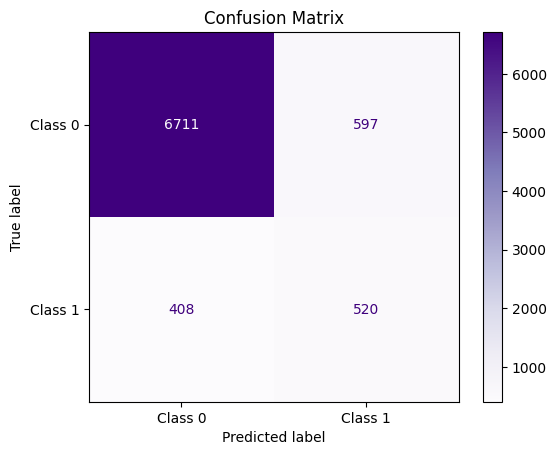

In [24]:
# Load the dataset
data = pd.read_csv("BankDataset.csv")

# Define X and y
X = data.drop(columns=["y"])
y = data["y"]

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE with enhanced focus on the minority class
smote = SMOTE(
    random_state=42,
    sampling_strategy=1.0,
    k_neighbors=3
)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    bootstrap=True,
    oob_score=True,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train_smote, y_train_smote)

scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")

# Predictions for training and testing sets
y_train_pred = rf_model.predict(X_train_smote)
y_test_pred = rf_model.predict(X_test)

# Classification reports
train_report = classification_report(y_train_smote, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Training Set Report:\n", train_report)
print("\nTesting Set Report:\n", test_report)

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]), "\n")

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()